In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df.drop(['Cabin'], axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(331, 11)

In [7]:
x = df[['Age', 'Fare']]
y = df['Survived']

In [8]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [10]:
x.shape

(331, 2)

In [11]:
y.shape

(331,)

In [12]:
lr.fit(x,y)

LogisticRegression()

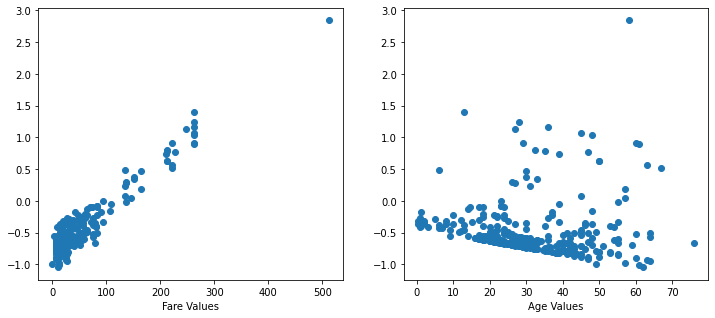

In [13]:
import numpy as np
import matplotlib.pyplot as plt
prob_fare = lr.predict_proba(x)[:,1]
# log_odds = np.log(predicted / (1 - predicted))
log_values_fare = np.log(prob_fare/(1-prob_fare))

prob_age = lr.predict_proba(x)[:,0]
log_values_age = np.log(prob_age/(1-prob_age))
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].set_xlabel("Fare Values")
ax[0].scatter(x= x['Fare'], y=log_values_fare)

ax[1].set_xlabel("Age Values")
ax[1].scatter(x=x['Age'], y = log_values_fare)

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x_moon, output_moon = make_moons(n_samples=500, noise=0.2,random_state=42)
# x_train,x_test,y_train,y_test = train_test_split(x_moon,output_moon,random_state=2,test_size=0.2)

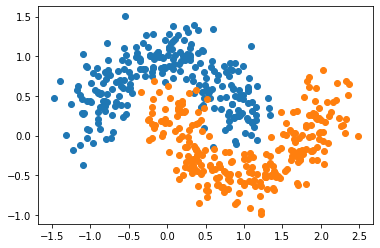

<Figure size 1080x576 with 0 Axes>

In [15]:
plt.scatter(x_moon[:, 0][output_moon==0], x_moon[:,1][output_moon==0])
plt.scatter(x_moon[:, 0][output_moon==1], x_moon[:,1][output_moon==1])
plt.figure(figsize=(15,8))
plt.show()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_moon,output_moon,random_state=2,test_size=0.2)

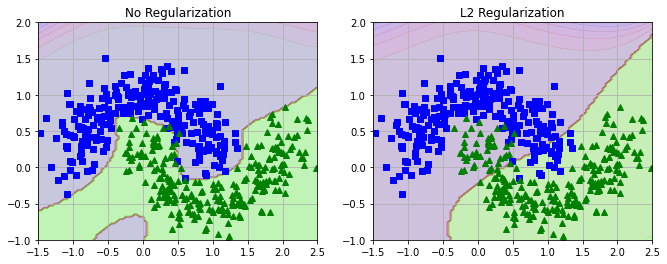

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# Create a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  # C=0.1 implies a stronger regularization
])

model_no_reg.fit(x_train, y_train)
model_l2.fit(x_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 2.0])
plot_dataset(x_moon, output_moon, [-1.5, 2.5, -1, 2])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 2])
plot_dataset(x_moon, output_moon, [-1.5, 2.5, -1, 2])
plt.title("L2 Regularization")

plt.show()

In [31]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_new = titanic.dropna().select_dtypes(include=['number'])
titanic_new.drop(['PassengerId'],axis=1,inplace=True)

In [32]:
titanic_new

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542
872,0,1,33.0,0,0,5.0000
879,1,1,56.0,0,1,83.1583
887,1,1,19.0,0,0,30.0000


In [33]:
features = titanic_new.drop('Survived', axis=1)
target = titanic_new['Survived']

### Eliminate Features using L1 penalty(Regularization) in Logistic Regression

In [48]:
scale = StandardScaler()
features = scale.fit_transform(features)

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

lr = LogisticRegression(penalty='l1', solver='liblinear',C=0.5,random_state=42)

lr.fit(x_train,y_train)

coef = lr.coef_
column_names = titanic_new.drop('Survived',axis=1).columns
eliminated_column = column_names[coef[0]==0]
print('Eliminate feature:', eliminated_column[0])

Eliminate feature: SibSp


In [44]:
coef

array([[-0.10313963, -0.38245202,  0.        , -0.10773421,  0.26175659]])